__Student info:__

- Student name: Thomas Brown
- Student pace: Full Time
- Scheduled project review date/time: TBD
- Instructor name: Abhineet Kulkarni
- Blog post URL: TBD

__Use Case:__<br><br>
The purpose of this project is to start building a neural network model that can determine the sentiment of financial news headlines.  The users of this model would be investment firms who want to keep track of the market sentiment of a set of various products, companies, or industries.  <br><br>
With proper web scraping and feeding of new headlines, a firm would be able to keep track of various topics to make better informed investing decisions.  For example, one could feasibly keep track of terms that are rising rapidly in terms of positive sentiment in order to invest in them.<br><br>
The data is collected from Kaggle through this [link](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news).  It's a collection of 4,837 unique news headlines from various financial news sources. 

## Importing Libraries:

In [38]:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Keras:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling1D


# NLTK - Stopwords:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet


# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
from wordcloud import WordCloud
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
# So we can see the entire column:
pd.set_option('display.max_colwidth', -1)

# Importing Data:

In [2]:
df = pd.read_csv('all-data.csv', names = ['Sentiment', 'Headline'], 
                 encoding='latin-1')
display(df.head())
print("Shape:", df.shape, "\n\n")
print(df.info())

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


Shape: (4846, 2) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
Sentiment    4846 non-null object
Headline     4846 non-null object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [3]:
# Let's take a look at the number of instances of each sentiment:
df.Sentiment.value_counts()
# Not too many negatives.  This may prove to be an issue later on, but for now, let's keep moving.

neutral     2879
positive    1363
negative    604 
Name: Sentiment, dtype: int64

# Cleaning Data:

First, the labels need to be changed to numerical values in order to go through the neural network later on. Due to a low number of negative articles compared to the rest, I'll be treating this as a binary problem: 'Positive' vs 'Not Positive'.

- 0 is Negative or Neutral
- 1 is Positive

In [4]:
# BINARY
df['Sentiment'] = df['Sentiment'].map(lambda x: 1 if x == 'positive' else 0)
df.head()

,Sentiment,Headline
0,0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,0,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,0,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


## Stopwords:

Next, we can remove all the 'stopwords' that can clog up the system later on.  The punctuation will get filtered out later.

In [5]:
stop = set(stopwords.words('english'))
stop.add("'s")
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df['Headline'] = df['Headline'].map(remove_stopwords)

In [6]:
df.head()

,Sentiment,Headline
0,0,"according gran , company plans move production russia , although company growing ."
1,0,"technopolis plans develop stages area less 100,000 square meters order host companies working computer technologies telecommunications , statement said ."
2,0,"international electronic industry company elcoteq laid tens employees tallinn facility ; contrary earlier layoffs company contracted ranks office workers , daily postimees reported ."
3,1,new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability .
4,1,"according company updated strategy years 2009-2012 , basware targets long-term net sales growth range 20 % -40 % operating profit margin 10 % -20 % net sales ."


## Lemmatization:

In [7]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [8]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()]
    return " ".join(text)

df['Headline'] = df['Headline'].map(lemmatize)

In [9]:
# Still looking good
df.head()

,Sentiment,Headline
0,0,"accord gran , company plan move production russia , although company grow ."
1,0,"technopolis plan develop stage area less 100,000 square meter order host company work computer technology telecommunication , statement say ."
2,0,"international electronic industry company elcoteq laid ten employee tallinn facility ; contrary earlier layoff company contract rank office worker , daily postimees report ."
3,1,new production plant company would increase capacity meet expect increase demand would improve use raw material therefore increase production profitability .
4,1,"accord company update strategy year 2009-2012 , basware target long-term net sale growth range 20 % -40 % operating profit margin 10 % -20 % net sale ."


# EDA:

Let's explore some word clouds to see the most commonly occurring words for each label.

In [10]:
# Separating out the categories
pos = df.Headline[df.Sentiment[df.Sentiment== 1].index]
neg = df.Headline[df.Sentiment[df.Sentiment== 0].index]

In [11]:
 def wordcloud(dataset):
    plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
    wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(dataset))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show();

def show_wordclouds():
    print ('Positive Sentiment Wordcloud:')
    wordcloud(pos)
    ###
    print ('Negative Sentiment Wordcloud:')
    wordcloud(neg)
    ###
    

In [12]:
# Showing Word Clounds
#show_wordclouds()

Not too much useful information here.  There are some more words we can clean, but I would like to stay on the conservative side for now.

# Additional Cleaning:

As we saw above, there are a few words that are quite common that occur in all 3 labels.  We'll add this to these to the stop word list and run the headlines through the filter again:
- 'finnish'
- 'say'
- 'company'
I'm leaving in 'eur' for now as it doesn't appear heavily in the 'Neutral' category.  This may help later on.  Depending on how the neural network performs later, I may or may not activate the following cells.

In [13]:
# Taking out a few more stop words:
stop.add("finnish")
stop.add("say")
stop.add("company")

df['Headline'] = df['Headline'].map(remove_stopwords)

In [14]:
# Starting to feel a little like caveman speak, but hopefully this will be easier for the model to read!
df.head()

,Sentiment,Headline
0,0,"accord gran , plan move production russia , although grow ."
1,0,"technopolis plan develop stage area less 100,000 square meter order host work computer technology telecommunication , statement ."
2,0,"international electronic industry elcoteq laid ten employee tallinn facility ; contrary earlier layoff contract rank office worker , daily postimees report ."
3,1,new production plant would increase capacity meet expect increase demand would improve use raw material therefore increase production profitability .
4,1,"accord update strategy year 2009-2012 , basware target long-term net sale growth range 20 % -40 % operating profit margin 10 % -20 % net sale ."


In [15]:
pos = df.Headline[df.Sentiment[df.Sentiment== 1].index]
neg = df.Headline[df.Sentiment[df.Sentiment== 0].index]


In [16]:
# Showing Word Clounds with additional words removed
#show_wordclouds()

# Counter:

In [45]:
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [46]:
text = df.Headline
counter = counter_word(text)

In [47]:
len(counter)

10094

In [48]:
counter

Counter({'accord': 123,
         'gran': 2,
         ',': 4662,
         'plan': 89,
         'move': 32,
         'production': 130,
         'russia': 85,
         'although': 3,
         'grow': 63,
         '.': 4780,
         'technopolis': 17,
         'develop': 38,
         'stage': 11,
         'area': 96,
         'less': 11,
         '100,000': 6,
         'square': 21,
         'meter': 6,
         'order': 150,
         'host': 6,
         'work': 69,
         'computer': 15,
         'technology': 145,
         'telecommunication': 20,
         'statement': 27,
         'international': 45,
         'electronic': 22,
         'industry': 104,
         'elcoteq': 39,
         'laid': 10,
         'ten': 14,
         'employee': 84,
         'tallinn': 11,
         'facility': 70,
         ';': 30,
         'contrary': 1,
         'earlier': 83,
         'layoff': 9,
         'contract': 177,
         'rank': 3,
         'office': 65,
         'worker': 15,
         'daily'

In [49]:
num_words = len(counter)

# Train/Test Split:

In [17]:
# Generating the lists of headlines and labels
headlines = []
labels = []

for row in range(len(df)):
    headlines.append(df['Headline'][row])
    labels.append(df['Sentiment'][row])

In [18]:
# Setting the training ratio
training_size = int(df.shape[0] * .8) # Out of 4846

In [19]:
# Train Test Split:
training_headlines = headlines[0:training_size]
testing_headlines = headlines[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [20]:
# Looks good
display(training_headlines[:3])
display(training_labels[:3])

['accord gran , plan move production russia , although grow .',
 'technopolis plan develop stage area less 100,000 square meter order host work computer technology telecommunication , statement .',
 'international electronic industry elcoteq laid ten employee tallinn facility ; contrary earlier layoff contract rank office worker , daily postimees report .']

[0, 0, 0]

# Tokenization:

In [50]:
vocab_size = len(counter) # approx 1/5 of the words 
embedding_dim = 32
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [51]:

# Initializing the fitting the tokenizer:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_headlines)
# Initializing the Word Index:
word_index = tokenizer.word_index
# Padding and Sequencing the Training Set:
training_sequences = tokenizer.texts_to_sequences(training_headlines)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                               padding = padding_type, 
                               truncating = trunc_type)
# Padding and Sequencing the Testing Set:
testing_sequences = tokenizer.texts_to_sequences(testing_headlines)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, 
                               padding = padding_type, 
                               truncating = trunc_type)


In [52]:
# Switch to Numpy Array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [53]:
# Example of what's happening under the hood:
print ('Padded and Tokenized Headline:\n', training_padded[3])
print ('\nThe actual headline:\n', df.Headline[3])
print ('\nLabel:\n', training_labels[3])

Padded and Tokenized Headline:
 [  16   67   52  115   24  211 1235   61   24  415  115  226   74  646
  232 1542   24   67  941    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

The actual headline:
 new production plant would increase capacity meet expect increase demand would improve use raw material therefore increase production profitability .

Label:
 1


## Taking a Look at Inputs:

In [54]:
# So far looks good:
n = 0

display(training_headlines[n])
print('-----------------')
display(training_padded[n])
print('-----------------')
display(training_labels[n])
print('-----------------')

display(testing_headlines[n])
print('-----------------')
display(testing_padded[n])
print('-----------------')
display(testing_labels[n])
print('-----------------')


'accord gran , plan move production russia , although grow .'

-----------------


array([  66, 2625,  113,  398,   67,   98, 2626,  142,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

-----------------


0

-----------------


'orange-handled scissors fiskars part permanent design collection museum modern art new york , well philadelphia museum art .'

-----------------


array([1321, 5946, 1691,  404,  104, 1921,  120, 1899, 4970, 1734, 1097,
         16, 1492,   70,    1, 4970, 1097,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

-----------------


0

-----------------


# Neural Network:

In [55]:
# First let's define the functions for model evaluation
def model_eval(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

Now it's time to build a baseline neural network:

## TEST ZONE

In [110]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.2)) # Optional Regularization
model.add(Dense(35, activation='relu')) # Optional second hidden layer
model.add(Dropout(0.2)) # Optional Regularization
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code


In [111]:
num_epochs = 15
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs,
                    batch_size = 10,
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 1)

Train on 3876 samples, validate on 970 samples
Epoch 1/15
3876/3876 [==============================] - 3s 719us/step - loss: 0.6222 - acc: 0.6669 - val_loss: 0.4495 - val_acc: 0.9186
Epoch 2/15
3876/3876 [==============================] - 2s 462us/step - loss: 0.4767 - acc: 0.7763 - val_loss: 0.8481 - val_acc: 0.5216
Epoch 3/15
3876/3876 [==============================] - 2s 462us/step - loss: 0.2910 - acc: 0.8795 - val_loss: 0.5910 - val_acc: 0.7258
Epoch 4/15
3876/3876 [==============================] - 2s 465us/step - loss: 0.1957 - acc: 0.9272 - val_loss: 0.5942 - val_acc: 0.7443
Epoch 5/15
3876/3876 [==============================] - 2s 464us/step - loss: 0.1313 - acc: 0.9541 - val_loss: 1.2056 - val_acc: 0.5670
Epoch 6/15
3876/3876 [==============================] - 2s 466us/step - loss: 0.0929 - acc: 0.9701 - val_loss: 0.9471 - val_acc: 0.6825
Epoch 7/15
3876/3876 [==============================] - 2s 469us/step - loss: 0.0670 - acc: 0.9807 - val_loss: 1.4345 - val_acc: 0.5969
E

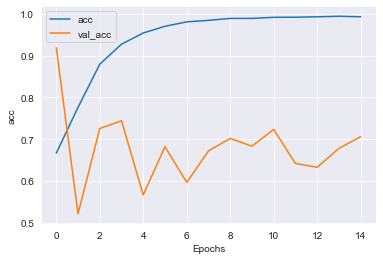

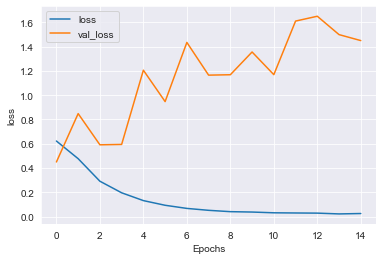

In [112]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

### LSTM Test:

In [129]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, dropout = 0.1))
model.add(Dense(35, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code

In [130]:
num_epochs = 10
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs,
                    batch_size = 24,
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 1)

Train on 3876 samples, validate on 970 samples
Epoch 1/10
3876/3876 [==============================] - 11s 3ms/step - loss: 0.6399 - acc: 0.6682 - val_loss: 0.4614 - val_acc: 0.9186
Epoch 2/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.6310 - acc: 0.6729 - val_loss: 0.5126 - val_acc: 0.7299
Epoch 3/10
3876/3876 [==============================] - 10s 3ms/step - loss: 0.5271 - acc: 0.7482 - val_loss: 0.6618 - val_acc: 0.4814
Epoch 4/10
3876/3876 [==============================] - 10s 3ms/step - loss: 0.4914 - acc: 0.7399 - val_loss: 0.6489 - val_acc: 0.3546
Epoch 5/10
3876/3876 [==============================] - 10s 3ms/step - loss: 0.4943 - acc: 0.7750 - val_loss: 0.5829 - val_acc: 0.5247
Epoch 6/10
3876/3876 [==============================] - 12s 3ms/step - loss: 0.4846 - acc: 0.7884 - val_loss: 0.6095 - val_acc: 0.5052
Epoch 7/10
3876/3876 [==============================] - 12s 3ms/step - loss: 0.4681 - acc: 0.7980 - val_loss: 0.6241 - val_acc: 0.4918
Epoch 8/1

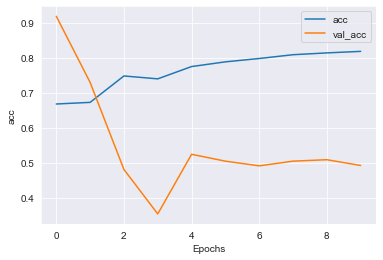

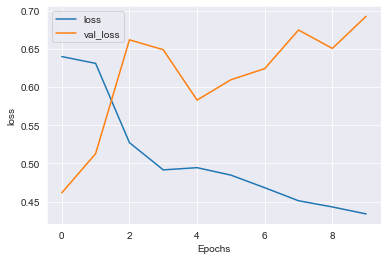

In [131]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [132]:
sentence = ["Stocks rise rapidly for Tesla", 
            "Apple factory shuts down",
           "Average day of returns for Microsoft"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, 
                       padding=padding_type, 
                       truncating=trunc_type)
print(model.predict(padded))

[[0.6818569 ]
 [0.10923757]
 [0.68185663]]


In [133]:
sentence = ["Former Nissan Executive Greg Kelly Pleads Not Guilty at Tokyo Trial", 
            "Amazon to Hire 100,000 in U.S. and Canada",
           "Disney’s ‘Mulan’ Tops China Box Office Amid Controversy"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, 
                       padding=padding_type, 
                       truncating=trunc_type)
print(model.predict(padded))

[[0.10923951]
 [0.10924755]
 [0.6818502 ]]


## End TEST ZONE:

## Baseline Model:

In [31]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2), # Optional Regularization
    keras.layers.Dense(50, activation='relu'), # Optional second hidden layer
    keras.layers.Dropout(0.2), # Optional Regularization
    keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            352000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1650      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total para

In [33]:
num_epochs = 10
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose= 2)

Train on 3876 samples, validate on 970 samples
Epoch 1/10
 - 1s - loss: 0.6377 - acc: 0.6685 - val_loss: 0.4578 - val_acc: 0.9186
Epoch 2/10
 - 1s - loss: 0.5760 - acc: 0.6953 - val_loss: 0.5134 - val_acc: 0.7031
Epoch 3/10
 - 1s - loss: 0.4159 - acc: 0.8127 - val_loss: 0.7084 - val_acc: 0.6423
Epoch 4/10
 - 1s - loss: 0.2589 - acc: 0.8942 - val_loss: 0.5505 - val_acc: 0.7567
Epoch 5/10
 - 1s - loss: 0.1793 - acc: 0.9347 - val_loss: 0.8380 - val_acc: 0.6464
Epoch 6/10
 - 1s - loss: 0.1239 - acc: 0.9551 - val_loss: 0.6699 - val_acc: 0.7454
Epoch 7/10
 - 1s - loss: 0.0855 - acc: 0.9708 - val_loss: 0.9235 - val_acc: 0.6804
Epoch 8/10
 - 1s - loss: 0.0623 - acc: 0.9799 - val_loss: 0.9045 - val_acc: 0.7134
Epoch 9/10
 - 1s - loss: 0.0492 - acc: 0.9848 - val_loss: 0.9316 - val_acc: 0.7351
Epoch 10/10
 - 1s - loss: 0.0392 - acc: 0.9881 - val_loss: 1.0185 - val_acc: 0.7258


### Model Evaluation:

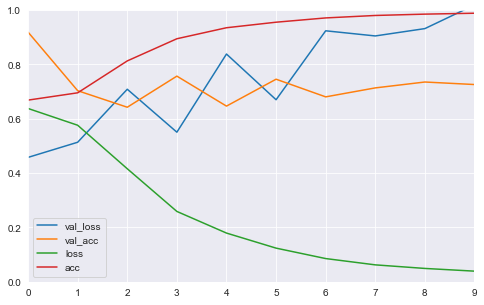

In [34]:
model_eval(history)

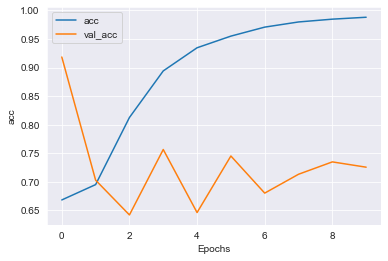

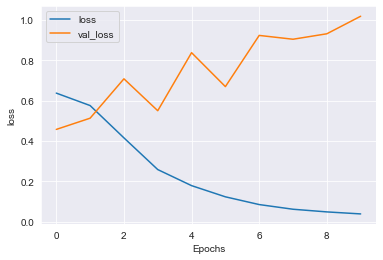

In [35]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

## Neural Network with Transfer Learning:

### Model Evaluation:

# Other:

In [30]:
print break_

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(break_)? (<ipython-input-30-8dc0057c2caf>, line 1)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_headlines[2])
print(labels[2])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
'''
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()
'''

In [109]:
# Testing Made Up Headlines:
sentence = ["Stocks rise rapidly for Tesla", 
            "Apple factory shuts down",
           "Average day of returns for Microsoft"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, 
                       padding=padding_type, 
                       truncating=trunc_type)
print(model.predict(padded))

[[0.95369536]
 [0.00872585]
 [0.44319487]]


# Further Work:

In the future, I'd like to complete the following analysis:
- A web application that collects and analyzes headlines from various financial news sources.
- Other neural network architecture types.
- New types of sentiment analysis, such as breaking news vs an opinion piece on an older issue.

# Conclusion: